In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [3]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4360, 50), (1090, 50), (4360,), (1090,))

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [8]:
model.fit(x_train,y_train)
print('model trained sucessfully')



model trained sucessfully


In [9]:
# score
model.score(x_train,y_train)

0.8591743119266055

In [10]:
# score
model.score(x_test,y_test)

0.8064220183486238

In [11]:
from sklearn import metrics

In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

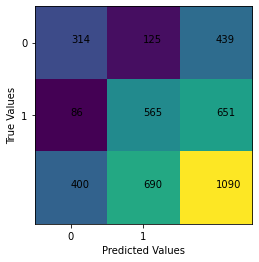

In [13]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [14]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.785000,0.715262,0.748510,439.000000
female,0.818841,0.867896,0.842655,651.000000
accuracy,0.806422,0.806422,0.806422,0.806422
macro avg,0.801920,0.791579,0.795582,1090.000000
weighted avg,0.805211,0.806422,0.804738,1090.000000


In [15]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5917168166728799

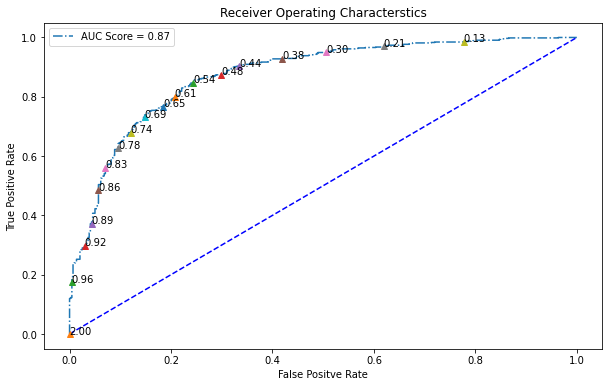

In [16]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [20]:
model_tune = SVC()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }


In [23]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)


In [24]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.7s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.7s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   2.2s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   2.4s
[CV] END ...............C=1, coef0=0, gamma=0.

KeyboardInterrupt: 

In [23]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [24]:
model_grid.best_score_

0.7867889908256881

In [25]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [26]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8064220183486238

In [27]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

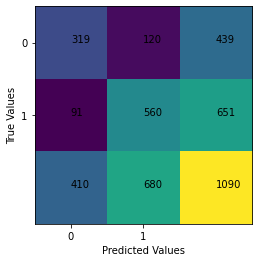

In [28]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [29]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.778049,0.726651,0.751472,439.000000
female,0.823529,0.860215,0.841473,651.000000
accuracy,0.806422,0.806422,0.806422,0.806422
macro avg,0.800789,0.793433,0.796472,1090.000000
weighted avg,0.805212,0.806422,0.805225,1090.000000


In [30]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5932476168579666

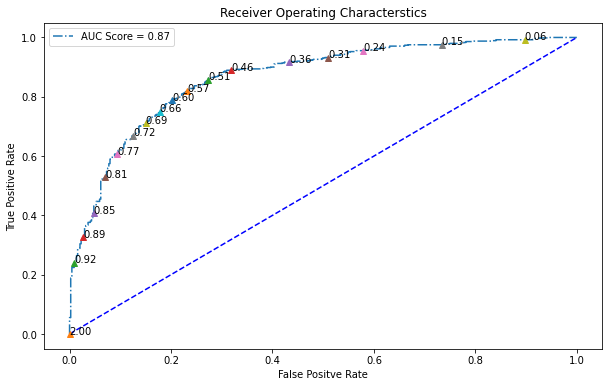

In [31]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [25]:
# save our machine learning model
import pickle

In [33]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [35]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))

In [36]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))

In [27]:
#model = pickle.load(open('./model_svm.pickle','rb'))